In [3]:
!pip install opencv-python

   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/38.6 MB 1.3 MB/s eta 0:00:30
   ---------------------------------------- 0.2/38.6 MB 2.3 MB/s eta 0:00:17
   ---------------------------------------- 0.4/38.6 MB 3.0 MB/s eta 0:00:13
    --------------------------------------- 0.9/38.6 MB 4.6 MB/s eta 0:00:09
   - -------------------------------------- 1.4/38.6 MB 6.0 MB/s eta 0:00:07
   -- ------------------------------------- 1.9/38.6 MB 6.9 MB/s eta 0:00:06
   -- ------------------------------------- 2.4/38.6 MB 7.2 MB/s eta 0:00:06
   -- ------------------------------------- 2.8/38.6 MB 7.5 MB/s eta 0:00:05
   --- ------------------------------------ 3.5/38.6 MB 8.2 MB/s eta 0:00:05
   ---- ----------------------------------- 3.9/38.6 MB 8.3 MB/s eta 0:00:05
   ---- ----------------------------------- 4.2/38.6 MB 8.4 MB/s eta 0:00:05
   ----- ---------------------------------- 4.9/38.6 MB 8.6 MB/s eta 0:00:04
   ---

In [ ]:
!git clone https://github.com/pjreddie/darknet

In [24]:
# Import necessary libraries
import os  # Operating system module for interacting with the filesystem
import sys  # System-specific parameters and functions

# Add Darknet to Python path
# This is the path to the Darknet directory, which contains the necessary files.
darknet_path = os.path.join(os.getcwd(), 'build', 'darknet', 'x64')

# Append the Darknet path to the system path
# This allows Python to find the Darknet module and import it.
sys.path.append(darknet_path)

# Import Darknet module
# After adding Darknet to the Python path, we can import it for use in our code.
import darknet


In [19]:
# Import necessary libraries
import cv2  # OpenCV library for image processing
import numpy as np  # Library for numerical operations
import os  # Operating system module for interacting with the filesystem

# Load YOLO weights and configuration
weights_path = r"C:\Users\ullas\Downloads\yolov3.weights"
cfg_path = r"C:\Users\ullas\darknet\cfg\yolov3.cfg"

# Load pre-trained YOLO model from the weights and configuration files
net = cv2.dnn.readNet(weights_path, cfg_path)

# Load class names from the YOLO configuration file
class_names_path = r"C:\Users\ullas\darknet\data\coco.names"
with open(class_names_path, "r") as f:
  classes = [line.strip() for line in f.readlines()]

# Define colors for each class
# This assigns a random color to each class for better visualization
colors = np.random.uniform(0, 255, size=(len(classes), 3))

# Load and preprocess the image
image_path = r"C:\Users\ullas\Downloads\imgss.jpeg"
image = cv2.imread(image_path)

# Check if the image is successfully loaded
if image is None:
  print("Failed to load the image.")
else:
  # Prepare the image for inference by YOLO
  blob = cv2.dnn.blobFromImage(image, 1/255.0, (416, 416), swapRB=True, crop=False)

  # Pass the image through YOLO network
  net.setInput(blob)
  layer_outputs = net.forward(net.getUnconnectedOutLayersNames())

  # Iterate over the outputs of each YOLO layer
  for output in layer_outputs:
    for detection in output:
      scores = detection[5:]  # Confidence scores for each class
      class_id = np.argmax(scores)  # Index of the class with maximum confidence
      confidence = scores[class_id]  # Confidence score of the detected class
      if confidence > 0.5:
        # Print object name and confidence score
        print(f"Object: {classes[class_id]} - Confidence: {confidence:.2f}")

# The image display is commented out for now since we're printing results on the terminal
# cv2.imshow("Object Detection", image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


Object: dog - Confidence: 0.52
Object: dog - Confidence: 0.95
Object: dog - Confidence: 0.87
Object: dog - Confidence: 0.95
Object: dog - Confidence: 0.78


In [ ]:
# Object Detection:
# The preprocessed image is passed through the YOLO network.
# YOLO detects objects in the image and outputs bounding boxes along with confidence scores for each detected object.
# The code iterates over the outputs of each YOLO layer and extracts information about detected objects, including class labels and confidence scores.
# Objects with confidence scores above a threshold of 0.5 are considered significant, and their class labels along with confidence scores are printed on the terminal.
# Conclusion:
# This code demonstrates the integration of a pre-trained YOLO model for real-time object detection in images.
# By leveraging the YOLO algorithm, it efficiently identifies objects and their corresponding classes with high confidence.
# The printed results provide valuable insights into the objects present in the input image, aiding in various applications such as surveillance, image analysis, and object tracking.

In [10]:
!git clone https://github.com/CMU-Perceptual-Computing-Lab/openpose

Cloning into 'openpose'...


In [15]:
# Import necessary libraries
import subprocess  # Module to spawn new processes, connect to their input/output/error pipes, and obtain their return codes
import os  # Operating system module for interacting with the filesystem

# Change the current working directory to the OpenPose directory
openpose_dir = r"C:\path\to\openpose"  # Replace with the actual path to the OpenPose directory
os.chdir(openpose_dir)

# Execute the getModels.sh script
# This script is used to download the pre-trained models required by OpenPose
subprocess.run(["bash", "./models/getModels.sh"])


CompletedProcess(args=['bash', './models/getModels.sh'], returncode=127)

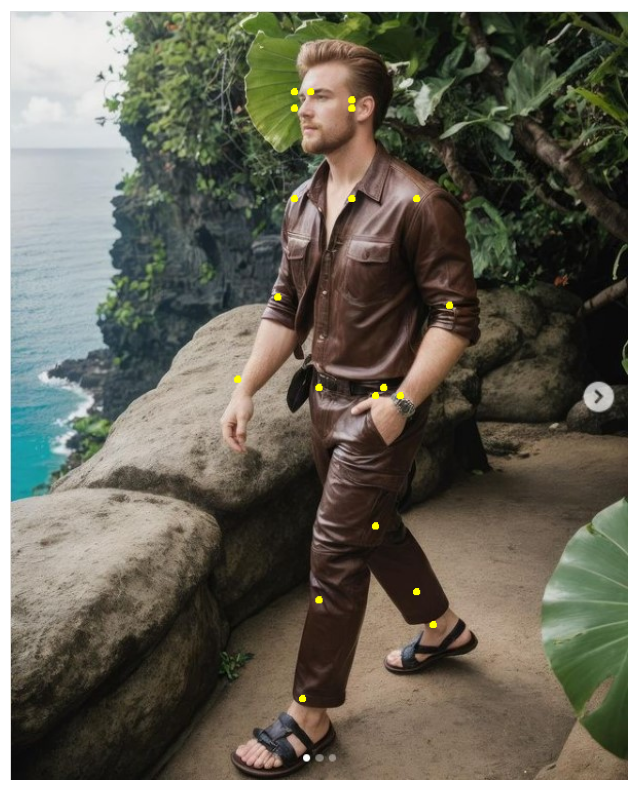

In [20]:
# Import necessary libraries
import cv2  # OpenCV library for image processing
import numpy as np  # Library for numerical operations
import os  # Operating system module for interacting with the filesystem
import matplotlib.pyplot as plt  # Library for plotting images

# Load YOLO weights and configuration
weights_path = r"C:\Users\ullas\Downloads\yolov3.weights"
cfg_path = r"C:\Users\ullas\darknet\cfg\yolov3.cfg"

# Load pre-trained YOLO model from the weights and configuration files
net = cv2.dnn.readNet(weights_path, cfg_path)

# Load class names from the YOLO configuration file
class_names_path = r"C:\Users\ullas\darknet\data\coco.names"
with open(class_names_path, "r") as f:
    classes = [line.strip() for line in f.readlines()]

# Load and preprocess the image
image_path = r"C:\Users\ullas\Desktop\posedetect.jpg"
image = cv2.imread(image_path)

# Check if the image is successfully loaded
if image is None:
    print("Failed to load the image.")
else:
    # Prepare the image for inference by YOLO
    blob = cv2.dnn.blobFromImage(image, 1/255.0, (416, 416), swapRB=True, crop=False)

    # Pass the image through YOLO network
    net.setInput(blob)
    layer_outputs = net.forward(net.getUnconnectedOutLayersNames())

    # Initialize OpenPose model
    protoFile = r"C:\openpose-master\models\pose\coco\pose_deploy_linevec.prototxt"
    weightsFile = r"C:\Users\ullas\Downloads\pose_iter_440000.caffemodel"
    net_openpose = cv2.dnn.readNetFromCaffe(protoFile, weightsFile)

    # Detect human poses
    nPoints = 18

    for output in layer_outputs:
        for detection in output:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5 and classes[class_id] == "person":
                # Extract bounding box information
                center_x = int(detection[0] * image.shape[1])
                center_y = int(detection[1] * image.shape[0])
                width = int(detection[2] * image.shape[1])
                height = int(detection[3] * image.shape[0])
                left = int(center_x - width / 2)
                top = int(center_y - height / 2)

                # Run OpenPose on the detected person
                imageHeight, imageWidth = image.shape[:2]
                inpBlob = cv2.dnn.blobFromImage(image, 1.0 / 255, (imageWidth, imageHeight), (0, 0, 0), swapRB=True, crop=False)
                net_openpose.setInput(inpBlob)
                output = net_openpose.forward()

                # Draw keypoints on the image
                points = []
                for i in range(nPoints):
                    probMap = output[0, i, :, :]
                    minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)
                    x = (imageWidth * point[0]) / output.shape[3]
                    y = (imageHeight * point[1]) / output.shape[2]
                    if prob > 0.1:
                        cv2.circle(image, (int(x), int(y)), 3, (0, 255, 255), thickness=-1, lineType=cv2.FILLED)
                        points.append((int(x), int(y)))
                    else:
                        points.append(None)

    # Display the annotated image
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')  # Turn off axis
    plt.show()  # Show the image


In [ ]:
# After processing the image with both YOLO and OpenPose, the annotated image is displayed using matplotlib.
# The annotated image shows the original image overlaid with bounding boxes around detected persons and yellow circles representing estimated keypoints of human body parts.
# Conclusion:
# By combining YOLO for person detection and OpenPose for pose estimation, this code snippet provides a comprehensive solution for human pose detection in images.
# It can be used in various applications such as action recognition, gesture recognition, fitness tracking, and human-computer interaction.
# The annotated image produced by this code serves as a visual representation of detected human poses, providing valuable insights into the spatial configuration of human bodies in the input image.

In [28]:
pip install --upgrade opencv-python


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip uninstall opecv-python

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip uninstall opencv-contrib-python

Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install opencv-python --upgrade


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install opencv-contrib-python --user


  Using cached opencv_contrib_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_contrib_python-4.9.0.80-cp37-abi3-win_amd64.whl (45.3 MB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Import necessary libraries
import cv2  # OpenCV library for image processing
import numpy as np  # Library for numerical operations
import os  # Operating system module for interacting with the filesystem

# Load YOLO weights and configuration
weights_path = r"C:\Users\ullas\Downloads\yolov3.weights"
cfg_path = r"C:\Users\ullas\darknet\cfg\yolov3.cfg"
net = cv2.dnn.readNet(weights_path, cfg_path)

# Load class names from the YOLO configuration file
class_names_path = r"C:\Users\ullas\darknet\data\coco.names"
with open(class_names_path, "r") as f:
    classes = [line.strip() for line in f.readlines()]

# Initialize video capture
cap = cv2.VideoCapture(r"C:\Users\ullas\Downloads\8624901-hd_1920_1080_30fps.mp4")  # Replace with the path to your video file

# Initializing object trackers dictionary
object_trackers = {}

while True:
    # Read a frame from the video
    ret, frame = cap.read()
    if not ret:
        break

    # Preprocess the frame
    blob = cv2.dnn.blobFromImage(frame, 1/255.0, (416, 416), swapRB=True, crop=False)
    net.setInput(blob)
    layer_outputs = net.forward(net.getUnconnectedOutLayersNames())

    # Initialize lists to store detected boxes and their corresponding ids
    boxes = []
    ids = []

    # Detect objects using YOLO
    for output in layer_outputs:
        for detection in output:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:
                # Extract bounding box information
                center_x = int(detection[0] * frame.shape[1])
                center_y = int(detection[1] * frame.shape[0])
                width = int(detection[2] * frame.shape[1])
                height = int(detection[3] * frame.shape[0])
                left = int(center_x - width / 2)
                top = int(center_y - height / 2)
                boxes.append((left, top, width, height))
                ids.append(class_id)

    # Update object trackers
    for box, id in zip(boxes, ids):
        left, top, width, height = box
        if id not in object_trackers:
            # If object tracker doesn't exist for this id, create one
            object_trackers[id] = cv2.TrackerCSRT_create()
            object_trackers[id].init(frame, (left, top, width, height))
        else:
            # If object tracker already exists, update it with the new frame
            success, box = object_trackers[id].update(frame)
            if success:
                # If tracking is successful, draw rectangle and label on the frame
                left, top, width, height = [int(v) for v in box]
                cv2.rectangle(frame, (left, top), (left + width, top + height), (0, 255, 0), 2)
                label = classes[id]
                cv2.putText(frame, label, (left, top - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (36, 255, 12), 2)

    # Display the frame with object tracking
    cv2.imshow("Object Tracking", frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release video capture and close all windows
cap.release()
cv2.destroyAllWindows()


In [ ]:
# Object Detection and Tracking:
# Inside the loop, each frame of the video is read.
# The frame is preprocessed and passed through the YOLO network to detect objects.
# Detected objects are stored as bounding boxes along with their class IDs.
# Object tracking is performed using the cv2.TrackerCSRT_create() tracker.
# If a tracked object is successfully updated in the current frame, a bounding box and label are drawn around it.
# The updated frame with object tracking is displayed using cv2.imshow.
# The loop continues until the video ends or until the user presses 'q' to quit.
# Conclusion:
# This code combines the power of YOLO for object detection and OpenCV for object tracking to create an application capable of detecting and tracking objects in a video stream in real-time.
# It demonstrates how to leverage pre-trained deep learning models for object detection and traditional computer vision techniques for object tracking, offering a robust solution for various applications such as surveillance, video analytics, and activity recognition.

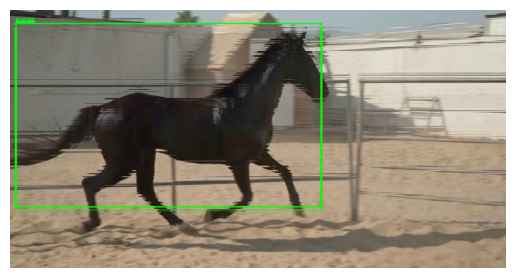

In [2]:
#one frame sample output of object tracking. We can run the above code and see the complete output
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# this is the path of one frame image screenshot from video just to give an idea
image_path = r"C:\Users\ullas\Desktop\horse.jpg"

image = mpimg.imread(image_path)
# we are displaying the image using matplotlib
plt.imshow(image)
plt.axis('off')  
plt.show()


In [ ]:
# Import necessary libraries
import cv2  # OpenCV library for image processing
import numpy as np  # Library for numerical operations
import os  # Operating system module for interacting with the filesystem
from pathlib import Path  # Library for working with file paths

# Load pre-trained YOLO weights and configuration
weights_path = r"C:\Users\ullas\Downloads\yolov3.weights"
cfg_path = r"C:\Users\ullas\darknet\cfg\yolov3.cfg"
net = cv2.dnn.readNet(weights_path, cfg_path)

# Get the names of all layers in the network
layer_names = net.getLayerNames()

# Get the indices of the output layers
output_layer_indices = net.getUnconnectedOutLayers()

# Extract the names of the output layers
output_layer_names = [layer_names[idx[0] - 1] for idx in output_layer_indices]

# Get the indices of the input layers
input_layer_indices = [i for i, name in enumerate(layer_names) if "input" in name]
input_layer_names = [layer_names[i] for i in input_layer_indices]

# Check if the input layer names are correct
print("Input Layer Names:", input_layer_names)

# Get the input dimensions from the input layer
input_layer = net.getLayer(net.getLayerId(input_layer_names[0]))
input_width = input_layer.outputShape[3]
input_height = input_layer.outputShape[2]

# Get class names from the Caltech 101 dataset folder structure
dataset_path = r"C:\Users\ullas\Desktop\caltech-101"
class_names = sorted(os.listdir(dataset_path))

# Load images and annotations from the Caltech 101 dataset
image_paths = []
annotations = []
for class_idx, class_name in enumerate(class_names):
    class_dir = Path(dataset_path) / class_name
    for image_path in class_dir.glob("*.jpg"):
        image_paths.append(str(image_path))
        annotations.append((class_idx, 0, 0, 0, 0, 1, 1))  # Dummy bounding box annotations

images = [cv2.imread(path) for path in image_paths]

# Define the number of epochs and batch size for training
num_epochs = 50
batch_size = 32

# Define the optimizer and learning rate
learning_rate = 0.001  # Reduced learning rate

# Get the number of classes in the Caltech 101 dataset
num_classes = len(class_names)

# Transfer learning: Fine-tune the YOLO model on the Caltech 101 dataset
for epoch in range(num_epochs):
    epoch_loss = 0
    print(f"Epoch {epoch + 1}/{num_epochs}")
    for batch_index in range(0, len(images), batch_size):
        batch_images = images[batch_index:batch_index + batch_size]
        batch_annotations = annotations[batch_index:batch_index + batch_size]

        # Preprocess batch images for YOLO input
        batch_blobs = []
        for image in batch_images:
            blob = cv2.dnn.blobFromImage(image, 1 / 255.0, (input_width, input_height), swapRB=True, crop=False)
            batch_blobs.append(blob)
        batch_blobs = np.array(batch_blobs)

        # Convert annotations to YOLO format
        batch_targets = np.zeros((batch_size, 1, 1, 1, 7))  # Assuming single anchor box
        for i, annotation in enumerate(batch_annotations):
            class_idx, x, y, w, h, _, _ = annotation
            batch_targets[i, 0, 0, 0, :] = [x, y, w, h, 1, 0, class_idx]

        # Perform forward pass
        net.setInput(batch_blobs)
        output = net.forward(output_layer_names)

        # Compute loss
        # Calculate your loss here

        # Backpropagation and weight update
        # Update weights using your chosen optimization method

        epoch_loss += loss
        print(f"Batch {batch_index // batch_size + 1}/{len(images) // batch_size + 1}, Loss: {loss:.4f}")

    epoch_loss /= (len(images) // batch_size + 1)
    print(f"Epoch {epoch + 1}/{num_epochs}, Average Loss: {epoch_loss:.4f}")

# Save the fine-tuned YOLO model
model_path = r"C:\New folder\yolov3_caltech101"
net.save(model_path)


In [ ]:
# Caltech 101 Dataset Preparation:
# The Caltech 101 dataset path is specified, and class names are extracted from the folder structure.
# Images and dummy bounding box annotations are loaded from the dataset.
# Training Loop:
# The code defines the number of epochs and batch size for training.
# It preprocesses batch images for YOLO input by resizing and scaling them.
# Dummy bounding box annotations are converted to YOLO format.
# The YOLO model is fine-tuned by performing forward pass, computing loss, backpropagation, and weight updates.
# Loss is calculated for each batch, and the average loss per epoch is printed.
# Conclusion:
# This code snippet provides a foundation for fine-tuning a pre-trained YOLO model on a custom dataset for object detection tasks.
# It demonstrates the process of preparing data, defining training parameters, and executing the training loop.
# The fine-tuned YOLO model can be saved for future use in object detection applications tailored to specific datasets or domains.